<a href="https://colab.research.google.com/github/Mrym17/MachineLearning-with-python/blob/main/Multivariate_Linear_Regression_with_Real_Estate_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# **Loading Dataset**

In [ ]:
data = pd.read_csv('/content/Real estate.csv')

In [ ]:
data.shape

(414, 8)

In [ ]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# **Data Visualization**

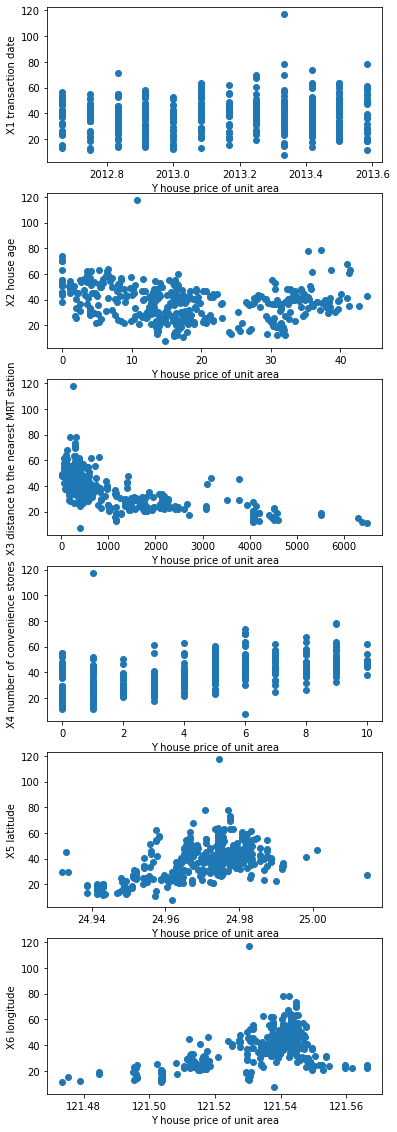

In [ ]:
# Pair-wise Scatter Plots

fig, ax = plt.subplots(6, figsize=(6, 20))
ax[0].scatter(x = data['X1 transaction date'], y = data['Y house price of unit area'])
ax[0].set_xlabel("Y house price of unit area")
ax[0].set_ylabel("X1 transaction date")

ax[1].scatter(x = data['X2 house age'], y = data['Y house price of unit area'])
ax[1].set_xlabel("Y house price of unit area")
ax[1].set_ylabel("X2 house age")
ax[2].scatter(x = data['X3 distance to the nearest MRT station'], y = data['Y house price of unit area'])
ax[2].set_xlabel("Y house price of unit area")
ax[2].set_ylabel("X3 distance to the nearest MRT station")
ax[3].scatter(x = data['X4 number of convenience stores'], y = data['Y house price of unit area'])
ax[3].set_xlabel("Y house price of unit area")
ax[3].set_ylabel("X4 number of convenience stores")
ax[4].scatter(x = data['X5 latitude'], y = data['Y house price of unit area'])
ax[4].set_xlabel("Y house price of unit area")
ax[4].set_ylabel("X5 latitude")
ax[5].scatter(x = data['X6 longitude'], y = data['Y house price of unit area'])
ax[5].set_xlabel("Y house price of unit area")
ax[5].set_ylabel("X6 longitude")


plt.show()

# **Data Preprocessing**

In [ ]:
#checking for missing values
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
#checking for duplicate rows
data.duplicated().sum()

0

### **Data Split**

In [ ]:
#Dropping cloumn No as its not a X feature 
data.drop(['No'],inplace=True, axis=1)

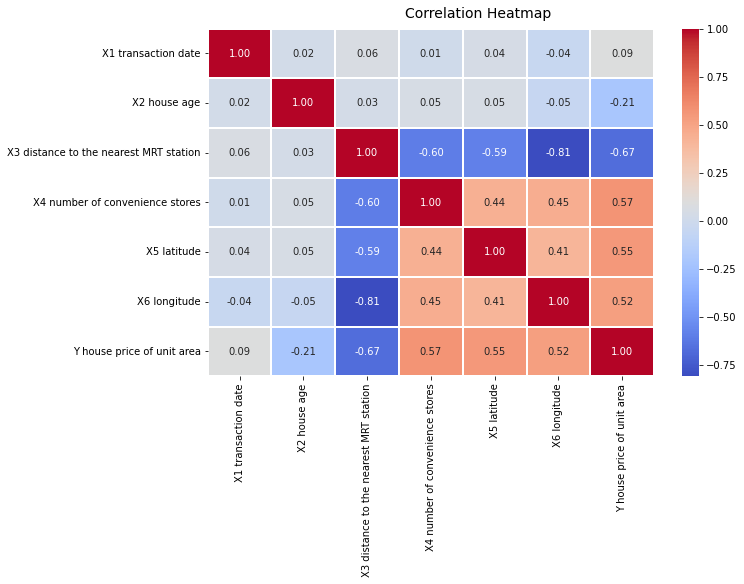

In [ ]:
#correlation
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

In [ ]:
#splitting data for training and testing
ratio = 0.7
 
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = data[0:train_size]
test = data[train_size:]

In [ ]:
train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
284,2012.917,15.0,383.28050,7,24.96735,121.54464,34.4
285,2013.167,30.1,718.29370,3,24.97509,121.53644,55.3
286,2012.917,5.9,90.45606,9,24.97433,121.54310,56.3
287,2013.000,19.2,461.10160,5,24.95425,121.53990,32.9


In [ ]:
train.shape, test.shape

((289, 7), (125, 7))

In [ ]:
#Separating Data for X and Y for Training data
train = train.values
Y = train[:, -1].reshape(train.shape[0], 1)
X = train[:, :-1]

In [ ]:
#Separating Data for X and Y of Testing data
test = test.values
Y_test = test[:, -1].reshape(test.shape[0], 1)
X_test = test[:, :-1]

In [ ]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (289, 6)
Shape of Y_train : (289, 1)
Shape of X_test : (125, 6)
Shape of Y_test : (125, 1)


# **Feature Scaling - Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data)

In [ ]:
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[ 3.70550611e-13 -9.22504156e-17 -1.26576152e-16 -7.50875476e-18
  1.34316605e-13 -1.61453674e-12  8.58143401e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print('Min values (X1 	X2 	X3 	X4 	X5 	X6 	): ', data_scaled.min(axis=0))
print('Max values (X1  	X2 	X3 	X4 	X5 	X6 	): ', data_scaled.max(axis=0))

Min values (X1 	X2 	X3 	X4 	X5 	X6 	):  [-1.71138378 -1.55663948 -0.84127874 -1.39163828 -2.9818054  -3.90322301
 -2.2354741 ]
Max values (X1  	X2 	X3 	X4 	X5 	X6 	):  [1.54115111 2.29265208 4.28700797 2.00740743 3.67561071 2.14689108
 5.85132778]


# **Adding Bias**

In [ ]:
#adding bias cloumn to train and test data
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

# **Functions**

In [ ]:
def model(X, Y, learning_rate, iteration):
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
  cost_list = []
  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))

    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta
    cost_list.append(cost)
# to print the cost for 10 times 
    if(i%(iteration/10) == 0):
       print("Cost is :", cost)
  return theta, cost_list

# **Training**

In [ ]:
iteration = 100
learning_rate = 0.001
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration =
iteration)

Cost is : 824.8466262975778
Cost is : 8.464479534956601e+77
Cost is : 1.3085078145474105e+153
Cost is : 2.0227973777485467e+228
Cost is : 3.1270040468513785e+303
Cost is : inf
Cost is : inf
Cost is : inf
Cost is : inf
Cost is : nan


<ipython-input-20-fff1cebe0362>:7: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m))*np.sum(np.square(y_pred - Y))


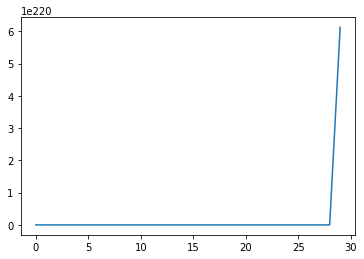

In [ ]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

error = (1/m) * ∑|y_pred−Y|

In [ ]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [ ]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 1.8838348233049466e+116 %
Test Accuracy is : -1.8838348233049466e+116 %


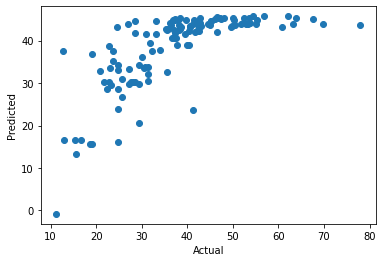

In [ ]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

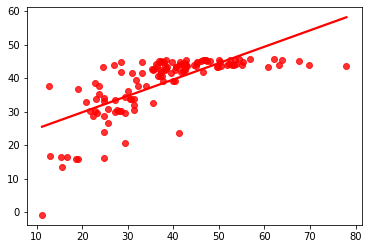

In [ ]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');